In [1]:
from part2_house_value_regression import Regressor
from sklearn import model_selection
import pandas as pd
import collections
import math
import random
from matplotlib import pyplot as plt

Generate first folds

In [3]:
output_label = "median_house_value"
data = pd.read_csv("housing.csv") 
x_train = data.loc[:, data.columns != output_label]
y_train = data.loc[:, [output_label]]
def genModel(hyperparam, x, y):
    xTrain, xValidation, yTrain, yValidation = model_selection.train_test_split(x, y, test_size=0.1)
    model = model_selection.GridSearchCV(
        estimator = Regressor(),
        param_grid = hyperparam,
        scoring="neg_root_mean_squared_error", #Scoring metric means lower is better
        cv=3,
        verbose=4,
        n_jobs=1,
        return_train_score = True
        )
    model.fit(xTrain, yTrain, xValidation=xValidation, yValidation=yValidation)
    print("model complete")
    return model
    
#This function will find the top two paramters and create a range between them
def getTopTwo(inputList):
    paramHeaders = {"nb_epoch" : 0, "learningRate" : 1, "neuronArchitecture" : 2, "batchSize" : 3}
    params = [[] for i in range(len(paramHeaders))]
    paramMode = dict()
    #Convert list of dictionaries to list per parameter
    for description in inputList:
        for key, value in description.items():
            params[paramHeaders[key]].append(tuple(value) if isinstance(value, list) else value)
    #Invert the dictionary
    paramInverted = {value: key for key, value in paramHeaders.items()}
    #Obtain the two most common items
    for index, value in enumerate(params):
        mode = collections.Counter(params[index]).most_common(2)
        paramMode[paramInverted[index]] = [i[0] for i in mode]
    return paramMode


In [3]:
hyperparam = {
        "nb_epoch" : [300], 
        "learningRate" : [0.01, 0.1, 1], 
        "neuronArchitecture" : [[9], [9,9], [9,9,9]], 
        "batchSize" : [64, 128, 256, 512],
        }
# hyperparam = {
#         'nb_epoch': [150], 
#         'learningRate': [0.03859925930841978, 0.07261032139183789, 0.018281914050446196, 0.026122808062702445], 
#         'neuronArchitecture': [[11, 10], [10, 8], [12, 10], [10, 9]], 
#         'batchSize': [81, 61, 123, 88]
#         }
model = genModel(hyperparam, x_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
0-1-2-3-Reached epoch cycle: 4 with error: 235773.32231509953
[CV 1/3] END batchSize=64, learningRate=0.001, nb_epoch=300, neuronArchitecture=[9];, score=(train=-237495.554, test=-237514.311) total time=   0.8s
0-1-2-3-Reached epoch cycle: 4 with error: 235780.64008792563
[CV 2/3] END batchSize=64, learningRate=0.001, nb_epoch=300, neuronArchitecture=[9];, score=(train=-237004.030, test=-238516.143) total time=   0.7s
0-1-2-3-Reached epoch cycle: 4 with error: 235770.17221529846
[CV 3/3] END batchSize=64, learningRate=0.001, nb_epoch=300, neuronArchitecture=[9];, score=(train=-238008.872, test=-236474.768) total time=   0.8s
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-

KeyboardInterrupt: 

In [15]:

results = pd.DataFrame(model.cv_results_)
print(results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       30.398413      1.270233         0.017436        0.001126   
1       13.423994      1.286935         0.018541        0.001758   
2        7.632521      0.995261         0.017063        0.002107   
3       10.509684      1.859718         0.016338        0.000943   
4        5.941128      0.081988         0.017671        0.001887   
5        4.748765      0.526413         0.019268        0.003188   
6        5.452556      0.422530         0.016655        0.001717   
7        3.769367      0.789441         0.015889        0.000725   
8        2.421690      0.832389         0.017284        0.001550   
9        0.748422      0.019454         0.016774        0.001111   
10      12.359227      1.234419         0.016546        0.000386   
11       5.609392      0.251305         0.016671        0.001249   
12       9.622285      1.460559         0.016124        0.000675   
13       3.972635      0.774365         0.017751

In [17]:
bestPerformer = results["mean_test_score"].max()
print(bestPerformer)
bestParams = model.best_params_
print(bestParams)

-68716.50754522865
{'batchSize': 128, 'learningRate': 1, 'nb_epoch': 150, 'neuronArchitecture': [9]}


In [16]:
results.to_csv("hyperparamresults/resultsbasewith1.csv", encoding='utf-8', index=False)
print(results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       30.398413      1.270233         0.017436        0.001126   
1       13.423994      1.286935         0.018541        0.001758   
2        7.632521      0.995261         0.017063        0.002107   
3       10.509684      1.859718         0.016338        0.000943   
4        5.941128      0.081988         0.017671        0.001887   
5        4.748765      0.526413         0.019268        0.003188   
6        5.452556      0.422530         0.016655        0.001717   
7        3.769367      0.789441         0.015889        0.000725   
8        2.421690      0.832389         0.017284        0.001550   
9        0.748422      0.019454         0.016774        0.001111   
10      12.359227      1.234419         0.016546        0.000386   
11       5.609392      0.251305         0.016671        0.001249   
12       9.622285      1.460559         0.016124        0.000675   
13       3.972635      0.774365         0.017751

In [18]:
candidateThreshold = 0.05
resultsTop = results.loc[results["mean_test_score"] >= bestPerformer*(1+candidateThreshold)]
#print(resultsTop)
paramList = resultsTop["params"].values
#Now, calculate all the new hyperparameters and prepare for next round
print("Found params:", paramList)

Found params: [{'batchSize': 64, 'learningRate': 0.01, 'nb_epoch': 150, 'neuronArchitecture': [9, 9]}
 {'batchSize': 64, 'learningRate': 0.01, 'nb_epoch': 150, 'neuronArchitecture': [9, 9, 9]}
 {'batchSize': 64, 'learningRate': 0.1, 'nb_epoch': 150, 'neuronArchitecture': [9]}
 {'batchSize': 64, 'learningRate': 0.1, 'nb_epoch': 150, 'neuronArchitecture': [9, 9]}
 {'batchSize': 64, 'learningRate': 0.1, 'nb_epoch': 150, 'neuronArchitecture': [9, 9, 9]}
 {'batchSize': 64, 'learningRate': 1, 'nb_epoch': 150, 'neuronArchitecture': [9]}
 {'batchSize': 128, 'learningRate': 0.01, 'nb_epoch': 150, 'neuronArchitecture': [9, 9]}
 {'batchSize': 128, 'learningRate': 0.01, 'nb_epoch': 150, 'neuronArchitecture': [9, 9, 9]}
 {'batchSize': 128, 'learningRate': 0.1, 'nb_epoch': 150, 'neuronArchitecture': [9]}
 {'batchSize': 128, 'learningRate': 0.1, 'nb_epoch': 150, 'neuronArchitecture': [9, 9]}
 {'batchSize': 128, 'learningRate': 0.1, 'nb_epoch': 150, 'neuronArchitecture': [9, 9, 9]}
 {'batchSize': 128,

Search for best params

In [19]:
newParams = getTopTwo(paramList)
print("Optimum params:", newParams)

Optimum params: {'nb_epoch': [150], 'learningRate': [0.1, 0.01], 'neuronArchitecture': [(9, 9), (9, 9, 9)], 'batchSize': [64, 128]}


In [9]:
#Find magnitudes
#Determine the amount of layers - prefer less layers
layerCount = min([len(x) for x in newParams["neuronArchitecture"]])
#Determine the magnitude of the learning rate 
if len(newParams["learningRate"]) >= 2:
    learningMagnitude = sum([math.log(x, 10) for x in newParams["learningRate"][:2]])/2
else:
    learningMagnitude = math.log(newParams["learningRate"][0], 10)
print("Layercount:", layerCount, "Learning Magnitude:", learningMagnitude, "Learning rate approx:", 10**learningMagnitude)

Layercount: 2 Learning Magnitude: -1.4999999999999996 Learning rate approx: 0.031622776601683826


In [10]:
newhyperparam = {"nb_epoch" : None, "learningRate" : None, "neuronArchitecture" : [], "batchSize" : None}
magnitudeModifier = 0.6
neuronModifier = 3
newhyperparam["learningRate"] = [10**random.uniform(learningMagnitude-magnitudeModifier, learningMagnitude+magnitudeModifier) for _ in range(4)]
#Neuron architecture
for i in range(4):
    maxNeurons = 13
    architecture = []
    for j in range(layerCount):
        #Ensure decreasing neurons
        maxNeurons = random.randint(maxNeurons-neuronModifier, maxNeurons)
        architecture.append(maxNeurons)
    newhyperparam["neuronArchitecture"].append(architecture)
#Batchsize
if len(newParams["batchSize"]) >= 2:
    batchMagnitude = sum([math.log(x, 2) for x in newParams["batchSize"][:2]])/2
else:
    batchMagnitude = math.log(newParams["batchSize"][0], 2)
newhyperparam["batchSize"] = [int(2**random.uniform(batchMagnitude-magnitudeModifier, batchMagnitude+magnitudeModifier)) for _ in range(4)]
newhyperparam["nb_epoch"] = newParams["nb_epoch"]
print("New hyperparameters:", newhyperparam)

New hyperparameters: {'nb_epoch': [150], 'learningRate': [0.01766855390055974, 0.028699358817341744, 0.054986877559540605, 0.01141687538307258], 'neuronArchitecture': [[12, 9], [11, 8], [12, 10], [11, 10]], 'batchSize': [77, 124, 78, 80]}


Epoch graphs

In [17]:
xTrain, xValidation, yTrain, yValidation = model_selection.train_test_split(x_train, y_train, test_size=0.1)
epochCalc = Regressor(xTrain, nb_epoch=300, learningRate=0.1, neuronArchitecture=[9,9], batchSize=128, minImprovement=0.00005)
epochCalc.fit(xTrain, yTrain,  xValidation=xValidation, yValidation=yValidation, plotData=False)
epochData = epochCalc.epochData
#print(epochData)

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-Reached epoch cycle: 59 with error: 67485.73784667643


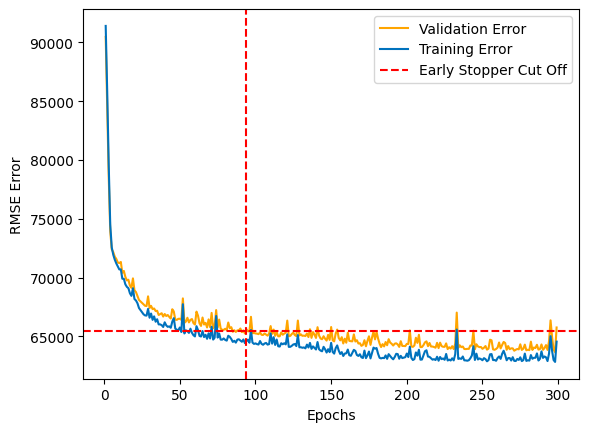

In [17]:
plt.plot(range(1, 300), epochData[1], label='Validation Error', color='orange')
plt.plot(range(1, 300), epochData[2], label='Training Error', color='#0072BD')
cutoffEpoch = 94
plt.axvline(cutoffEpoch, linestyle='--', color='red', label="Early Stopper Cut Off")
plt.axhline(epochData[1][cutoffEpoch], linestyle='--', color='red')
plt.xlabel("Epochs")
plt.ylabel("RMSE Error")
plt.legend()

In [39]:
blah = Regressor(x_train)
blah.fit(x_train, y_train)

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-72-73-74-75-76-77-78-79-80-81-82-83-84-85-86-87-88-89-90-91-92-93-94-95-96-97-

KeyboardInterrupt: 